# Quick start

本ライブラリは、各種データセットをQulacsの量子回路として保存したものを提供します。
まずは手書き数字のデータセットである [MNIST](http://yann.lecun.com/exdb/mnist/) を読み込んでみましょう。
データセットを読み込むと、その情報がすべて入ったDictオブジェクトが(メモリ上に展開された状態で)返ります。

In [3]:
!pip install mnisq

In [2]:
from mnisq.mnist import load_mnist_test_f80

dataset = load_mnist_test_f80()
print(f"dataset contains:")
for key in dataset:
  print(key)

100%|██████████| 10000/10000 [00:00<00:00, 57589.78it/s]


dataset contains:
circuit
state
qasm
label
fidelity


このデータセットには、以下の情報が含まれています。
- `state`: 元データから振幅エンコーディングされた量子状態
- `circuit`: `state`を有限個の2量子ビット密度演算子で近似した量子回路
- `qasm`: `circuit`のQASM表現
- `fidelity`: `state`と、`circuit`から作成された量子状態との内積値の2乗
- `label`: ラベル

データセットから5枚分の情報を見てみましょう。

label = 7 fidelity = 0.722768


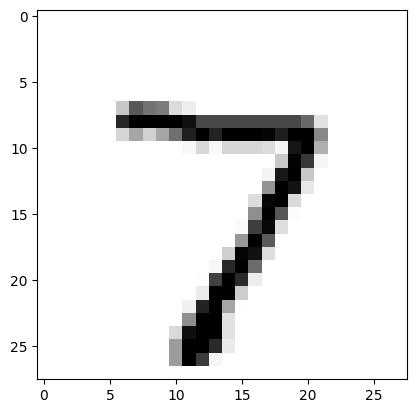

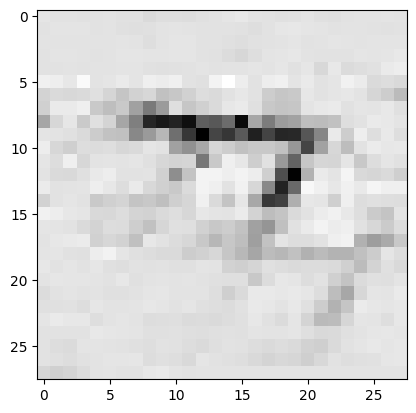

label = 2 fidelity = 0.854072


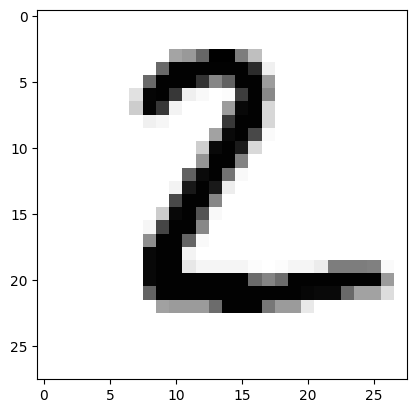

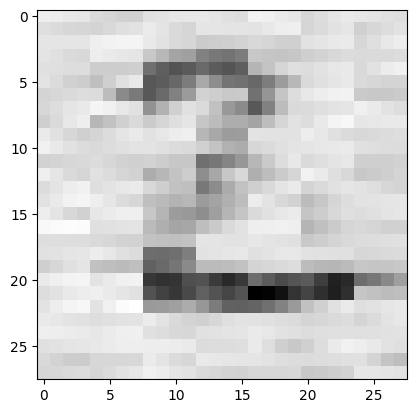

label = 1 fidelity = 0.657508


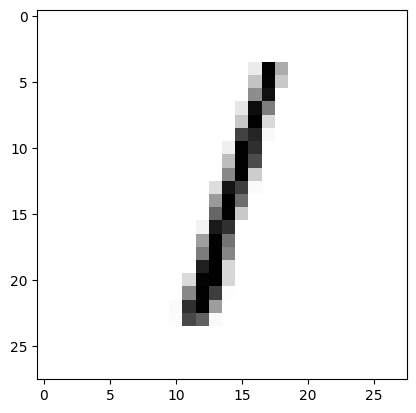

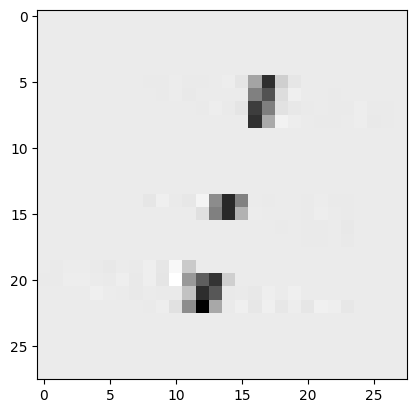

label = 0 fidelity = 0.838537


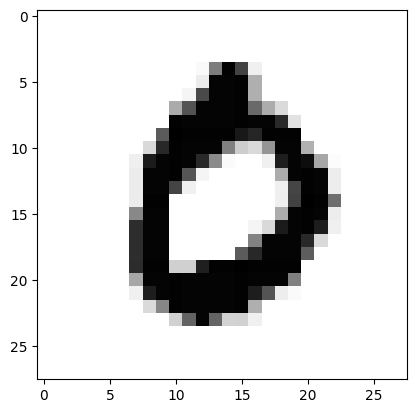

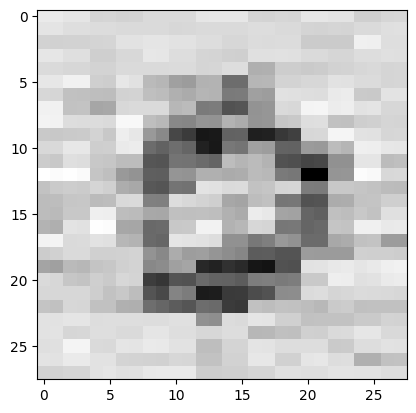

label = 4 fidelity = 0.768789


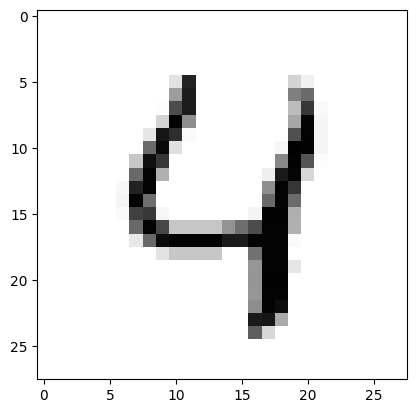

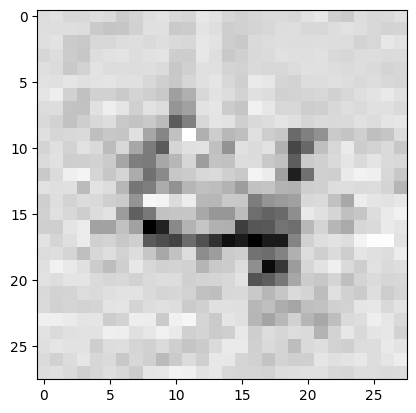

In [4]:
from qulacs import QuantumState
import numpy as np
import matplotlib.pyplot as plt

def show_figure(pict: np.array):
    plt.imshow(pict.reshape(28, 28), cmap="Greys")
    plt.show()


def show_state_figure(state: QuantumState):
    pict = state.get_vector()
    result = []
    for x in range(28 * 28):
        result.append(pict[x].real)
    show_figure(np.array(result))


for itr in range(5):
  # preparation
  label = dataset["label"][itr]
  fidelity = dataset["fidelity"][itr]
  original_state = dataset["state"][itr]
  circuit = dataset["circuit"][itr]
  approx_state = QuantumState(circuit.get_qubit_count())
  circuit.update_quantum_state(approx_state)
  
  print(f"label = {label} fidelity = {fidelity}")
  show_state_figure(original_state)
  show_state_figure(approx_state)

MNISTの他に、[Fashion-MNIST](https://github.com/zalandoresearch/fashion-mnist) や [Kuzushiji-MNIST](https://github.com/ranihorev/Kuzushiji_MNIST) に対応しています。

100%|██████████| 10000/10000 [00:00<00:00, 73937.49it/s]


Fashion MNIST
*** Quantum Circuit Info ***
# of qubit: 10
# of step : 15
# of gate : 30
# of 1 qubit gate: 3
# of 2 qubit gate: 27
Clifford  : no
Gaussian  : no


label = 9 fidelity = 0.909021


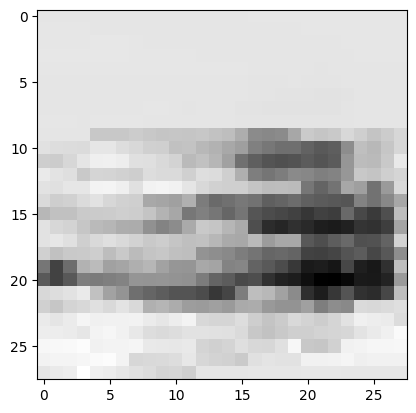

*** Quantum Circuit Info ***
# of qubit: 10
# of step : 13
# of gate : 30
# of 1 qubit gate: 3
# of 2 qubit gate: 27
Clifford  : no
Gaussian  : no


label = 2 fidelity = 0.920037


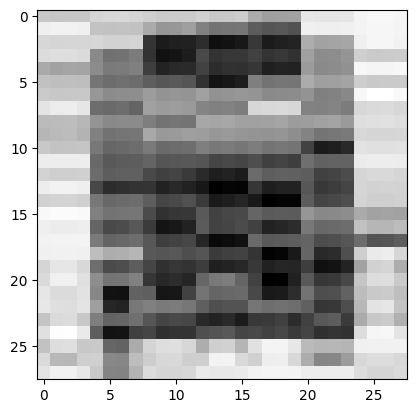

Kuzushiji MNIST
label = 2 fidelity = 0.778785


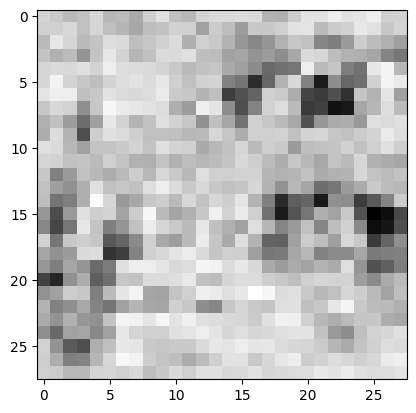

label = 9 fidelity = 0.831059


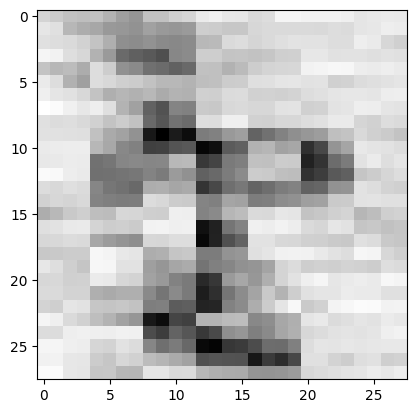

In [6]:

from mnisq.fashion_mnist import load_Fashion_test_f80 as load_fashion_mnist
from mnisq.kuzushiji_mnist import load_Kuzushiji_test_f80 as load_kuzushiji_mnist

fashion_dataset = load_fashion_mnist()
kuzushiji_dataset = load_kuzushiji_mnist()

print("Fashion MNIST")

for itr in range(2):
  # preparation
  label = fashion_dataset["label"][itr]
  fidelity = fashion_dataset["fidelity"][itr]
  circuit = fashion_dataset["circuit"][itr]
  print(circuit)
  approx_state = QuantumState(circuit.get_qubit_count())
  circuit.update_quantum_state(approx_state)
  
  print(f"label = {label} fidelity = {fidelity}")
  show_state_figure(approx_state)


print("Kuzushiji MNIST")

for itr in range(2):
  # preparation
  label = kuzushiji_dataset["label"][itr]
  fidelity = kuzushiji_dataset["fidelity"][itr]
  circuit = kuzushiji_dataset["circuit"][itr]
  approx_state = QuantumState(circuit.get_qubit_count())
  circuit.update_quantum_state(approx_state)
  
  print(f"label = {label} fidelity = {fidelity}")
  show_state_figure(approx_state)
